<a href="https://colab.research.google.com/github/RyomaBF/CAP4630/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. General Concepts

Artificial intelligence is defined as "the science and enginering of making intelligent machines.", by John McCarthy, one of the founders of artificial intelligence. 
There are other definitions of artificial intelligence as well.

-A branch of computer science dealing with the simulation of intelligent behavior in computers.

-The capability of a machine to imitate intelligent human behavior. 

-A computer system able to perform tasks that normally require human intelligence, such as visual perception, speech recognition, decision making, and translation between languages.



Symbolic artificial intelligence is the term for the collection of all methods in artificial intelligence research that are based on-level "symbolic" (human-readable) representations of problems, logic, and search. Symbolic artificial intelligence is often called GOFAI (Good Old-Fashioned Artificial Intelligence").
Simply, simbolic AI is a piece of code that takes an input and a set of rules that outputs some result. 

Machine learning is a subset of artificial intelligence. It is defined as a "field of study that gives computers the ability to learn without being expilicitly programmed.", by Arthur Samuel, who coined the term machine learning. 
Machine learning is dynamic and does not require humna intervention to make certain changes. Machine learning is different that symbolic AI because it is able to learn and modify itself when exposed to more data. Instead of input and a rule put into a code, an input and an output is ran into a code to output a rule that then modifies itself according to that rule. 

1. Building a Model

To build a model, we must first consider what we will be discussing. A label is what we're predicting, the y variable. 
A feature is an input variable, the x variable. 
Depending on the simplicity of the project, there could be a single feature of x, or when there are many more specified as x1, x2, ..., xn. 
A model defines the relationship between the features and the labels. In a model's life, there are 2 phases, training phase and the inference phase. Training means creating or learning the model, and the inference means applying the trained model to unlabeled examples. 
A regression model predicts continuous values. This type helps with prediction of data acquired over time.
A classification model predicts discrete values. This is kind of like categorization. 

We have discussed a convolution network in this class. Convolution networks are make up of many neural networks. A neural network is a piece of code that takes in x as an input, y as the true target, and a b as a weight bias. Simply, an input x and a weight A is introduced to a layer in which data transformation occurs. The result is sent to another layer along with a weight B, which become the prediction. Then, the prediction and the true target y is input to a loss function which outputs a loss score. This loss score is taken to the optimizer, which outputs an update to weight B, which gets used in the next iteration of the neural network. Layers such as these make up a network of layers which results in a neural network. 

To train a network, there must be a database as input with ground truth data. And after in which the data has been processed through convolutions and cutoff functions, such as reLu and sigmoid functions, we get our results. Convolutions extract tiles of the input feature map, and applies filters to them to compute new features, producing an output feature map, or convolved feature. 

In [3]:
#simple convnet from class notes
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-12-06 01:25:26--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  45.7MB/s    in 1.4s    

2019-12-06 01:25:28 (45.7 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
!ls /tmp/cats_and_dogs_filtered

train  validation  vectorize.py


In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
train_cat_fnames = os.listdir(train_cats_dir)
train_cat_fnames.sort()
print(train_cat_fnames[:10])
print(train_cat_fnames[-10:])
print()
train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])
print(train_dog_fnames[-10:])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['cat.990.jpg', 'cat.991.jpg', 'cat.992.jpg', 'cat.993.jpg', 'cat.994.jpg', 'cat.995.jpg', 'cat.996.jpg', 'cat.997.jpg', 'cat.998.jpg', 'cat.999.jpg']

['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
['dog.990.jpg', 'dog.991.jpg', 'dog.992.jpg', 'dog.993.jpg', 'dog.994.jpg', 'dog.995.jpg', 'dog.996.jpg', 'dog.997.jpg', 'dog.998.jpg', 'dog.999.jpg']


In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print()
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000

total validation cat images: 500
total validation dog images: 500


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

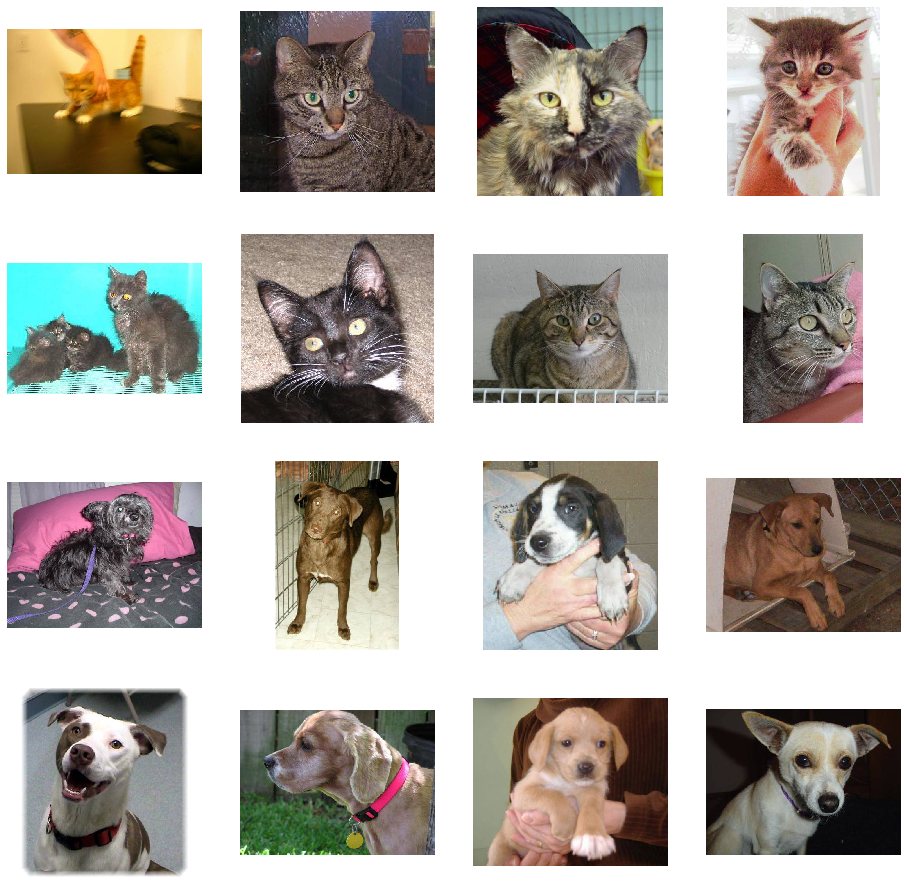

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [10]:
from keras import layers
from keras import models

model = models.Sequential()
# conv layers
# 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
# 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
# 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
# 4
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
# dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [11]:
from keras import optimizers

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rescale=1./255)

train_generator = generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = generator.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)




Epoch 1/30





100/100 [==============================] - 14s 142ms/step - loss: 0.6898 - acc: 0.5230 - val_loss: 0.6918 - val_acc: 0.5230
Epoch 2/30
100/100 [==============================] - 8s 76ms/step - loss: 0.6593 - acc: 0.6165 - val_loss: 0.6320 - val_acc: 0.6810
Epoch 3/30
100/100 [==============================] - 8s 76ms/step - loss: 0.6198 - acc: 0.6580 - val_loss: 0.5992 - val_acc: 0.6870
Epoch 4/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5750 - acc: 0.7130 - val_loss: 0.5731 - val_acc: 0.7090
Epoch 5/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5378 - acc: 0.7330 - val_loss: 0.5522 - val_acc: 0.7160
Epoch 6/30
100/100 [==============================] - 8s 76ms/step - loss: 0.5082 - acc: 0.7450 - val_loss: 0.5445 - val_acc: 0.7130
Epoch 7/30
100/100 [==============================] - 8s 78ms/step - loss: 0.4773 - acc: 0.7745 - val_loss: 0.5534 - val_acc: 0.7220
Epoch 8/30
100/100 [==============================] - 8s 76

In [14]:
model.save('cats_and_dogs_small_1.h5')
!ls

cats_and_dogs_small_1.h5  sample_data


In [0]:
from google.colab import files

with open('cats_and_dogs_small_1.h5', 'r') as f:
  files.download('cats_and_dogs_small_1.h5')

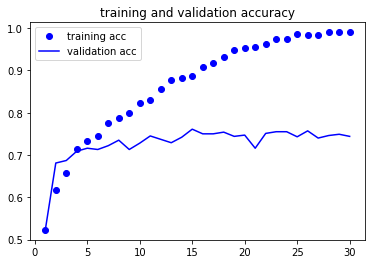

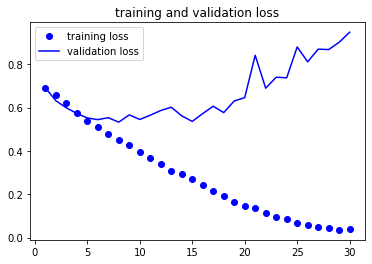

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

Above graphs show this method was "overfitting" as the training data got better but the testing accuracy did not go up. 

We have also discussed a much more complex neural network system, a Convolution Neural Network (CNN). This method was a breakthrough for building models for image classification. CNN takes just the image's raw pixel data as input and "learns" how to extract these features, and ultimately infer what object they constitute.  
First, the CNN recieves an input feature map. It is a 3 dimensional matrix, where the size of the first two dimensions corresponds to the length and the width of the images in pixels, and the size of the third dimension is 3 corresponding to red, green, and blue. 


During training, the CNN "learns" the optimal values for the filter matrices that enable it to extract meaningful features form the input feature map. As the number of filters increases, so does the number of features the CNN can extract. 


2. Comping a model

After convolution, an activation function, such as  rectified linear unit (relu) transformation, softmax activation, and sigmoid transformation is applied to the convolved feature to introduce nonlinearity. 

After this step, there is a pooling step, in which the CNN downsamples the feature to save processing time and reducing the number of dimensions of the feature map while conserving the most critical feature information. 

A mechanism called gradient descent is used for imporving perfomance. We use gradient descent to reach minimum loss. Since the gradient vector has both direction and magnitude, we can further use this information. We multiply these values with what is known as a learning rate as a weight to influence how the gradient descent will perform. 

3. Training a model

However, this is not the only thing we can do to optimize this network. Just throwing algorithms at the code will not help perform, so we must consider the actual functionality. If we do not, then we run into instances like over fitting and underfitting the model.

Under fitting is where the algorithms were too simple to deduce a proper prediction, which can cause no improvement on predictions.

Over fitting is where the algorithms are too complex or too unnecessary which cause the training accuracy to get better but the testing data will not get any better. Above example of the convolution network shows an example of overfitting. 


Below is an example of underfitting.

In [18]:
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 4s 0us/step


In [19]:
print(train_images.shape)
print(train_images.dtype)
print(train_labels.shape)

(50000, 32, 32, 3)
uint8
(50000, 1)


In [0]:
import matplotlib.pyplot as plt
import numpy as np

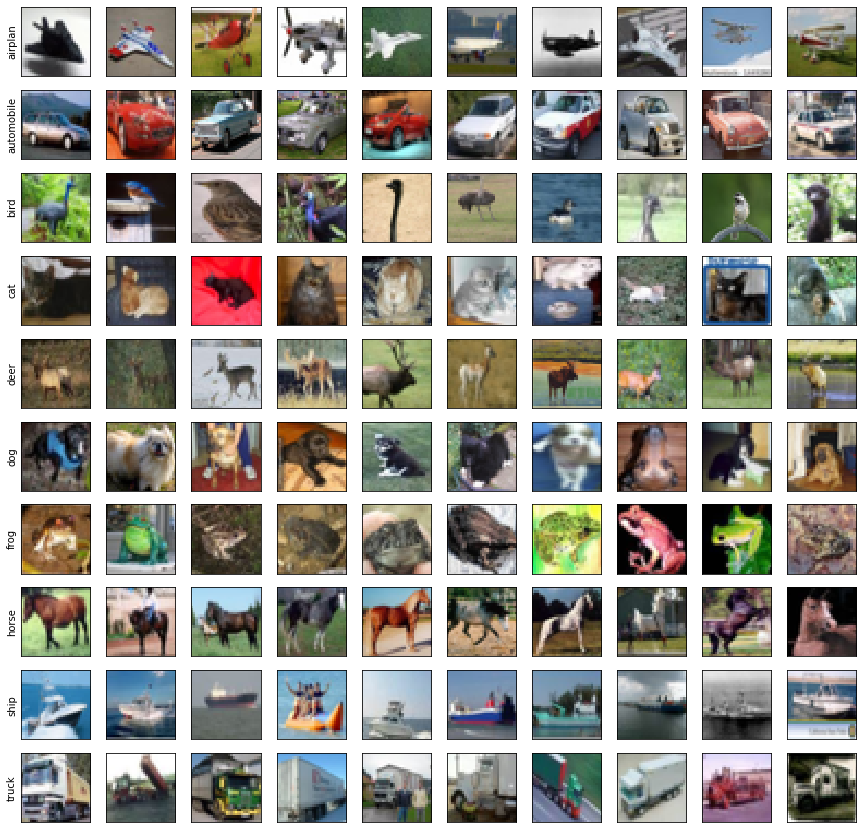

In [21]:
table = [[] for _ in range(10)]
for i in range(len(train_images)):
  label = train_labels[i, 0]
  table[label].append(i)

plt.figure(figsize=(15,15))
for class_index in range(10):
  for example_index in range(10):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    if example_index == 0:
      plt.ylabel(class_names[class_index], rotation=90)
    plt.grid(False)
    plt.imshow(train_images[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [23]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), 
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                147520    
_________________________________________

In [24]:
# compile the model
model.compile(optimizer='adam', #Adaptive Moment Estimation
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'])
            

# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 120us/sample - loss: 1.4332 - acc: 0.4880 - val_loss: 1.1692 - val_acc: 0.5892
Epoch 2/10
50000/50000 [==============================] - 6s 116us/sample - loss: 1.0821 - acc: 0.6208 - val_loss: 1.0052 - val_acc: 0.6468
Epoch 3/10
50000/50000 [==============================] - 6s 116us/sample - loss: 0.9598 - acc: 0.6662 - val_loss: 0.9658 - val_acc: 0.6628
Epoch 4/10
50000/50000 [==============================] - 6s 116us/sample - loss: 0.8785 - acc: 0.6950 - val_loss: 0.9287 - val_acc: 0.6812
Epoch 5/10
50000/50000 [==============================] - 6s 115us/sample - loss: 0.8099 - acc: 0.7196 - val_loss: 0.9133 - val_acc: 0.6907
Epoch 6/10
50000/50000 [==============================] - 6s 120us/sample - loss: 0.7539 - acc: 0.7406 - val_loss: 0.9628 - val_acc: 0.6740
Epoch 7/10
50000/50000 [==============================] - 6s 117us/sample - loss: 0.7114 - acc: 0.7533 - val_l

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.9320 - acc: 0.6998
Test accuracy: 0.6998


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)


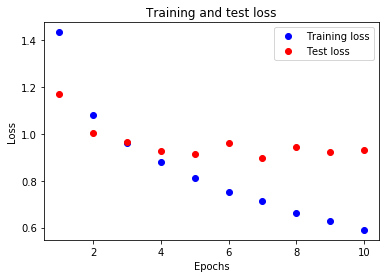

In [27]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4. Finetuning a pretrained model

There are many techniques to fine-tuning a model.

The common practive is to truncate the last softmax layer of the pre-trained network and replace it with a new softmax layer that are relevant to the problem that the model is trying to solve. If our task is classification on 10 categories, the new softmax layer of the network will be of 10 categories instead of 1000 categories. We then run back propagation on the network to fine-tune the pre-trained weights. Make sure cross validation is performed so that the network will be able to generalize well.

One can also use a smaller learning rate. By doing so, the model will take smaller steps, but in the end it might be much more efficient for the model.

It is also common to freeze the weights of layers of a pre-trained network. Upon certain layers, we may lose the data we want to capture and so by freezing certain layers we are able to extract better features by the model. an example code of freezing may look like this.

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False